## Train Visualizer

In [135]:
import numpy as np
import matplotlib.pyplot as plt

def read_log(log_file):
    log = np.loadtxt(log_file, dtype=str, delimiter=",", skiprows=1)
    
    epochs = []
    for i in range(np.shape(log)[0]):
        row_dict = {}
        for entry in log[i]:
            if not entry.strip():
                continue
            try:
                row_dict[entry.split(":")[0].replace(" ", "").strip()] = float(entry.split(":")[1])
            except ValueError:
                key = entry.split(":")[0].replace(" ", "").strip()
                entry = entry.replace("[", "")
                entry = entry.replace("]", "")
                split = entry.split(":")[1].split(" ")
                entry_val = [float(e) for e in split if e]
                row_dict[key] = entry_val
        epochs.append(row_dict)
                  
    return epochs

def plot_epochs(epochs, keys=[]):
    
    vals_to_plot = {}
    for key in keys:
        key_plot = []
        for epoch in epochs:
            key_plot.append(epoch[key])

        vals_to_plot[key] = key_plot
        
    i = 0
    for key in keys:
        plt.plot(range(len(epochs)), vals_to_plot[key], label=key)
        
    plt.legend()
    plt.show()
    

In [139]:

log_file = "/groups/funke/home/ecksteinn/Projects/other/cycle_attribution/checkpoints/ach_ser_1_3_auxlA10_auxlB10_netGUNet128_3/loss_log.txt"


In [140]:
epochs = read_log(log_file)
print(epochs[0])

{'epoch': 1.0, 'G_A': 0.554, 'D_A': 0.315, 'aux_real_A': [-49.427204, -33.866173, -50.9564, -64.945625, -77.5459, -51.819965], 'G_B': 0.539, 'D_B': 0.241, 'idt_A': 1.066, 'data': 0.129, 'idt_B': 0.628, 'cycle_B': 2.122, 'aux_cycle_B': 0.0, 'time': 0.171, 'aux_class_B': 1.644, 'iters': 100.0, 'aux_fake_B': [-14.439975, -14.167078, -13.367789, -8.43073, -25.703407, -13.522677], 'aux_real_B': [-6.10313, -4.051401, -5.3671303, -1.9955014, -3.2461984, -2.5352833], 'aux_fake_A': [-46.84048, -32.043343, -51.2764, -52.607407, -66.091, -48.7887], 'aux_class_A': 0.0, 'aux_cycle_A': 0.0, 'cycle_A': 1.256}


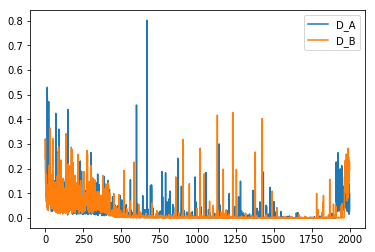

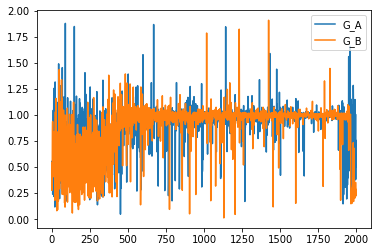

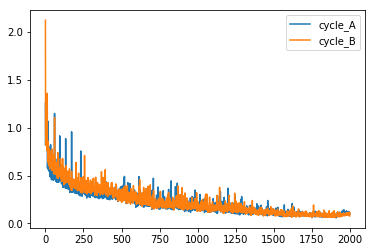

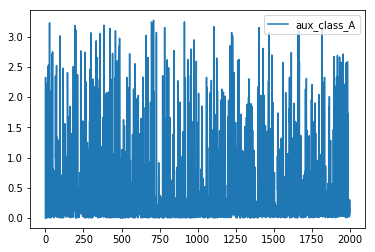

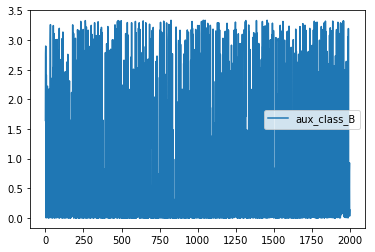

In [145]:
plot_epochs(epochs, keys=["D_A", "D_B"])
plot_epochs(epochs, keys=["G_A", "G_B"])
plot_epochs(epochs, keys=["cycle_A", "cycle_B"])
plot_epochs(epochs, keys=["aux_class_A"])
plot_epochs(epochs, keys=["aux_class_B"])

In [ ]:
dd